In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
plt.style.use('ggplot')

In [2]:
df_text = pd.read_csv('../data/training_text.csv',delimiter='\|\|',index_col=0)
df_variants = pd.read_csv('../data/training_variants.csv',index_col=0)
df_variants.head()

/home/z/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,Gene,Variation,Class
ID,,,
0,FAM58A,Truncating Mutations,1
1,CBL,W802*,2
2,CBL,Q249E,2
3,CBL,N454D,3
4,CBL,L399V,4


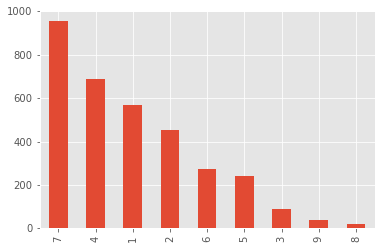

In [3]:
df_variants.Class.value_counts().plot(kind='bar',)

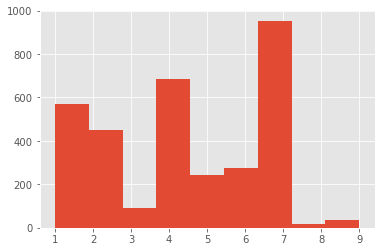

In [4]:
df_variants.Class.hist(bins=9)

In [10]:
df_varbin = pd.get_dummies(df_variants)


Gene         category
Variation    category
Class        category
dtype: object

In [135]:
df_variants['Mix'] = df_variants.apply(lambda x: str(x['Gene'])+'_'+str(x['Variation']),axis=1)

In [48]:
zip(df_variants['Gene'],df_variants['Gene'].cat.codes)

zip(df_variants['Gene'].cat.codes,df_variants['Variation'].cat.codes)

[('FAM58A', 85),
 ('CBL', 39),
 ('CBL', 39),
 ('CBL', 39),
 ('CBL', 39),
 ('CBL', 39),
 ('CBL', 39),
 ('CBL', 39),
 ('CBL', 39),
 ('CBL', 39),
 ('CBL', 39),
 ('CBL', 39),
 ('CBL', 39),
 ('CBL', 39),
 ('CBL', 39),
 ('CBL', 39),
 ('CBL', 39),
 ('CBL', 39),
 ('CBL', 39),
 ('CBL', 39),
 ('CBL', 39),
 ('CBL', 39),
 ('CBL', 39),
 ('CBL', 39),
 ('CBL', 39),
 ('CBL', 39),
 ('SHOC2', 228),
 ('TERT', 246),
 ('TERT', 246),
 ('TERT', 246),
 ('TERT', 246),
 ('TERT', 246),
 ('TERT', 246),
 ('TERT', 246),
 ('TERT', 246),
 ('DICER1', 62),
 ('DICER1', 62),
 ('DICER1', 62),
 ('DICER1', 62),
 ('DICER1', 62),
 ('DICER1', 62),
 ('DICER1', 62),
 ('DICER1', 62),
 ('DICER1', 62),
 ('PTPRT', 199),
 ('PTPRT', 199),
 ('PTPRT', 199),
 ('PTPRT', 199),
 ('PTPRT', 199),
 ('PTPRT', 199),
 ('PTPRT', 199),
 ('PTPRT', 199),
 ('PTPRT', 199),
 ('PTPRT', 199),
 ('PTPRT', 199),
 ('PTPRT', 199),
 ('PTPRT', 199),
 ('PTPRT', 199),
 ('PTPRT', 199),
 ('PTPRT', 199),
 ('PTPRT', 199),
 ('PTPRT', 199),
 ('PTPRT', 199),
 ('PTPRT', 1

In [137]:
for col in df_variants:
    df_variants[col] = df_variants[col].astype('category')
df_variants.dtypes


df_cat = df_variants
for col in df_variants:
    df_cat[col] = df_variants[col].cat.codes 


In [140]:
def ct_unique(df_):
    return {col:len(df_[col].unique()) for col in df_}
ct_unique(df_cat)

{'Class': 9, 'Gene': 264, 'Mix': 3321, 'Variation': 2996}

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7bc842ad50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f7bc29408d0>]], dtype=object)

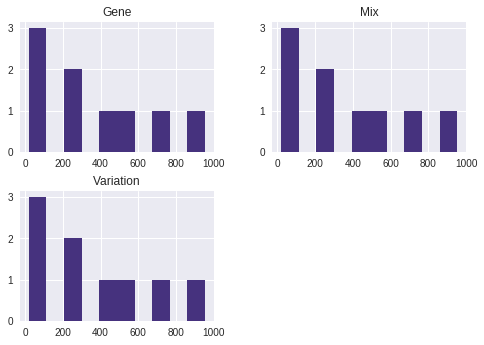

In [138]:
df_cat.groupby(['Class']).count().hist()

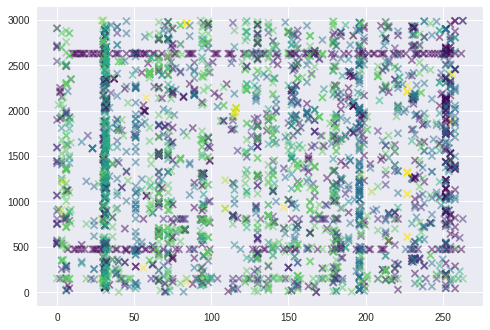

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition

import seaborn as sns
sns.set(palette='viridis')
np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = zip(df_variants['Gene'].cat.codes,df_variants['Variation'].cat.codes)
y = df_variants['Class']



from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans


# y = KMeans(n_clusters=9).fit_predict(X)

# pca = decomposition.PCA(n_components=2)
# LDA = LinearDiscriminantAnalysis(n_components=2)
# pca.fit(X,y)
# X = pca.transform(X)
# plt.scatter(X[:, 0], X[:, 1], c=y_pred)

fig, ax = plt.subplots()
plt.scatter(df_variants['Gene'].cat.codes,df_variants['Variation'].cat.codes, c=y,cmap=plt.cm.viridis,marker='x',alpha=.5)
# ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.viridis,marker='x')

# ax.legend(y,loc='best', shadow=False, scatterpoints=1)
